In [1]:
import pandas as pds
import numpy as np

#Reading in text file
ge_data = pds.read_csv("CDEX_fig6.txt", skiprows=1, \
                         names=['E', 'counts'], \
                         delim_whitespace=False
                     )

ge_data = ge_data.sort_values(by='E')

#Arrays of histogram data
E = np.asarray(ge_data["E"], dtype=np.float32)
counts = np.asarray(ge_data["counts"], dtype=np.float32)

#Asymmetric error bars for low counts
error1 = [0.00,0.37,0.74,1.10,2.34,2.75,3.82,4.25,5.30,6.33,6.78,7.81,8.83,9.28]
error2 = [1.29,2.75,4.25,5.30,6.78,7.81,9.28,10.30,11.32,12.79,13.81,14.82,16.29,17.30]
ntot = counts
ntot_plus = np.zeros(np.shape(ntot))
ntot_minus = np.zeros(np.shape(ntot))
for i,ncount in enumerate(ntot):
    if ncount<=20:
        ntot_plus[i] = error2[int(ncount)]-ncount
        ntot_minus[i] = ncount-error1[int(ncount)]
    else:
        ntot_plus[i] = np.sqrt(ncount)
        ntot_minus[i] = np.sqrt(ncount)

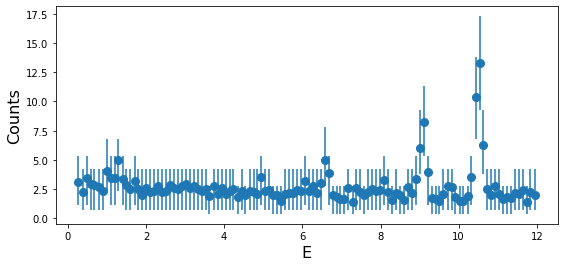

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt

#Plot of raw data 
fig,axes = plt.subplots(1,1, figsize=(9,4))
ax1=axes
ax1.errorbar(E, counts, yerr=[ntot_minus,ntot_plus], marker='o', markersize=8, linestyle = 'none')
plt.xlabel("E", fontsize=16)
plt.ylabel("Counts", fontsize=16)
plt.show(fig) 
#print(E)

In [3]:
import scipy
#from scipy.optimize import minimize
import numpy as np

#Define fixed means - These are the characteristic xray energies, defined by binding energies of S-shells of daughters after electron capture occurs
#ge_mu = 10.367
#ga_mu = 9.659
#zn_mu = 8.979
#fe_mu = 6.539
#mn_mu = 5.989
#v_mu = 4.966

#means=np.array([4.966, 5.989, 6.539, 8.979, 9.659, 10.367])
#Define Gaussian model function
#model= A1*e^-(x-mean1)^2/2*sig1^2+...
def Gauss(x, theta):
    amp1,amp2,amp3,amp4,amp5,amp6,sig1,sig2,sig3,sig4,sig5,sig6,mu1,mu2,mu3,mu4,mu5,mu6=theta
    amp=np.array([amp1,amp2,amp3,amp4,amp5,amp6])
    sig=np.array([sig1,sig2,sig3,sig4,sig5,sig6])
    mu=np.array([mu1,mu2,mu3,mu4,mu5,mu6])
    model = 0
    for i in range(len(mu)):
        model+=(amp[i]*np.exp(x-mu[i]))/(2*(sig[i])^2)
    
    return model
    
#Least Squares objective function to be minimized
def LSfunc(x, y, theta):
    model = Gauss(x, theta)
    
    return np.sum((y-model)**2)
"""
#minimization
#initial parameter guesses A1, sig1, A2, sig2...?
#guess=np.array([3, 0.1, 2.7, 0.1, 5, 0.2, 8, 0.3, 2.5, 0.25, 12.6, 0.25])
#make guess an ndarray with n = number of parameters
#when using minimize for fitting, maybe pass data and fixed parameters as args?
guess=np.ndarray([[3,2.7,5,8,2.5,12.6],[0.1,0.1,0.2,0.3,0.25,0.25]]

scipy.optimize.minimize(LSfunc(E, counts, means), guess)
"""

'\n#minimization\n#initial parameter guesses A1, sig1, A2, sig2...?\n#guess=np.array([3, 0.1, 2.7, 0.1, 5, 0.2, 8, 0.3, 2.5, 0.25, 12.6, 0.25])\n#make guess an ndarray with n = number of parameters\n#when using minimize for fitting, maybe pass data and fixed parameters as args?\nguess=np.ndarray([[3,2.7,5,8,2.5,12.6],[0.1,0.1,0.2,0.3,0.25,0.25]]\n\nscipy.optimize.minimize(LSfunc(E, counts, means), guess)\n'

In [6]:
import lmfit

f_model=lmfit.Model(Gauss)
f_params = f_model.make_params()

# amplitude parameters
f_params.add('A1', vary=True, value=2.5, min=0)
f_params.add('A2', vary=True, value=2.5, min=0)
f_params.add('A3', vary=True, value=3, min=0)
f_params.add('A4', vary=True, value=6, min=0)
f_params.add('A5', vary=True, value=2, min=0)
f_params.add('A6', vary=True, value=11, min=0)

#standard deviation sigma
f_params.add('SD1', vary=True, value=0.25, min=0)
f_params.add('SD2', vary=True, value=0.25, min=0)
f_params.add('SD3', vary=True, value=0.25, min=0)
f_params.add('SD4', vary=True, value=0.25, min=0)
f_params.add('SD5', vary=True, value=0.25, min=0)
f_params.add('SD6', vary=True, value=0.25, min=0)

#means
f_params.add('mean1', vary=False, value=4.966, min=0)
f_params.add('mean2', vary=False, value=5.989, min=0)
f_params.add('mean3', vary=False, value=6.539, min=0)
f_params.add('mean4', vary=False, value=8.979, min=0)
f_params.add('mean5', vary=False, value=9.659, min=0)
f_params.add('mean6', vary=False, value=10.367, min=0)

result=lmfit.minimize(LSfunc, f_params, args=(E, counts), method = 'leastsq')
lmfit.report_fit(result)

ValueError: too many values to unpack (expected 18)